In [1]:
from library.optimiser import *
from library.objective_function import *
from library.post_analysis import *
from library.experiments import *
import time
%matplotlib inline
SEED = 23191

In [48]:
def test_high_dimension_cma(opt):
    num = 1
    length = 10
    max_dim = np.arange(1, 200, 10).shape[0]
    stats = {}
    dims = np.arange(1, 200, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(1, 200, 10)):
        normlise_points = np.random.rand(dim, num) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.dim = dim
            opt.std = np.ones((dim,)) * 3
            opt.x0 = normlise_points[:,j]
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
        print("dim: {}, time: {}, cost: {}, evals: {}".format(dim, times[i], costs[i], evals[i]))
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    return stats

In [29]:
def test_high_dimension(opt):
    num = 10
    length = 10
    max_dim = np.arange(1, 500, 10).shape[0]
    stats = {}
    dims = np.arange(1, 500, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(1, 500, 10)):
        normlise_points = np.random.rand(dim, num) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.dim = dim
            opt.x0 = normlise_points[:,j]
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
        print("dim: {}, time: {}, cost: {}, evals: {}".format(dim, times[i], costs[i], evals[i]))
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    return stats

In [30]:
class post_analysis_highD:
    def __init__(self, stats):
        self.stats = stats
    def __plot(self, data, ylabel):
        fig = plt.figure(figsize=(10,6))
        ax = plt.subplot(111)
        ax.plot(self.stats['dims'], data)
        ax.set_xlabel("dimention")
        ax.set_ylabel(ylabel)
        
    def plot_time_vs_dim(self):
        self.__plot(self.stats['time'], "time(s)")
        
    def plot_evals_vs_dim(self):
        self.__plot(self.stats['evals'], "evals")
        
    def plot_cost_vs_dim(self):
        self.__plot(self.stats['cost'], "cost")
        

## Adam

In [31]:
ad = adam()
ad.verbose = False
stats_adam = test_high_dimension(ad)

dim: 1, time: 0.0029352903366088867, cost: 11.3125203714519, evals: 21.2
dim: 11, time: 0.006959319114685059, cost: 13.714320275980366, evals: 91.1
dim: 21, time: 0.0075097322463989254, cost: 13.240767910136924, evals: 101.1
dim: 31, time: 0.007419180870056152, cost: 13.591129442710322, evals: 103.4
dim: 41, time: 0.007717204093933105, cost: 13.53131975318951, evals: 108.2
dim: 51, time: 0.008444809913635254, cost: 13.668307542278535, evals: 109.1
dim: 61, time: 0.008178210258483887, cost: 13.745800223677227, evals: 110.8
dim: 71, time: 0.008478784561157226, cost: 13.576607479050912, evals: 111.8
dim: 81, time: 0.00989530086517334, cost: 13.427826218519078, evals: 113.2
dim: 91, time: 0.008493304252624512, cost: 13.526398244951238, evals: 114.6
dim: 101, time: 0.008878111839294434, cost: 13.863080946079794, evals: 115.5
dim: 111, time: 0.010349678993225097, cost: 13.418130676949962, evals: 117.2
dim: 121, time: 0.009256982803344726, cost: 13.714763739380302, evals: 117.6
dim: 131, time

In [32]:
ana_adam = post_analysis_highD(stats_adam)

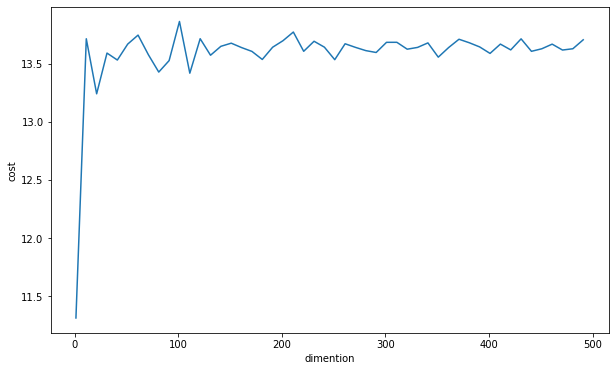

In [33]:
ana_adam.plot_cost_vs_dim()

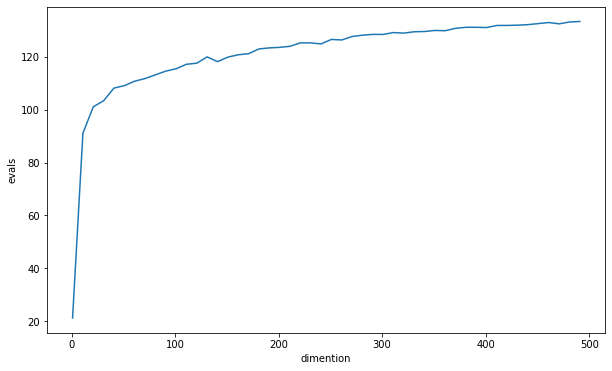

In [36]:
ana_adam.plot_evals_vs_dim()

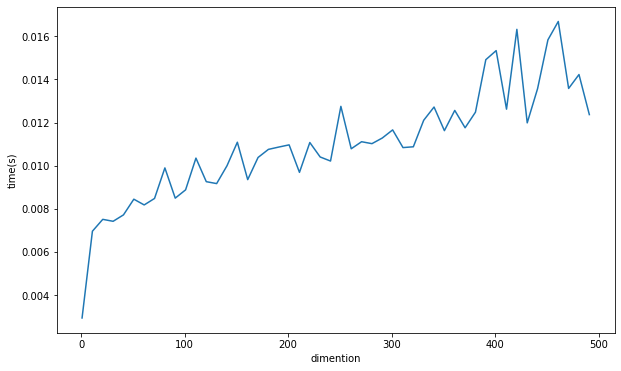

In [37]:
ana_adam.plot_time_vs_dim()

In [20]:
cma = cma_es()
stats_ad = test_high_dimension_cma(cma)

dim: 1, time: 0.03937792778015137, cost: 1.7296792624854618e-06, evals: 196.0
dim: 11, time: 0.31318020820617676, cost: 2.5791379965500738e-05, evals: 3839.0
dim: 21, time: 0.4485137462615967, cost: 0.0082663504355307, evals: 5200.0
dim: 31, time: 0.5610907077789307, cost: 0.29450176065664424, evals: 5600.0
dim: 41, time: 0.7663192749023438, cost: 2.027314080072085, evals: 6000.0
dim: 51, time: 0.9734439849853516, cost: 3.3053796735329866, evals: 6000.0
dim: 61, time: 1.1368680000305176, cost: 3.1667732428782007, evals: 6400.0
dim: 71, time: 1.464972972869873, cost: 4.5921453186339924, evals: 6400.0
dim: 81, time: 1.8459439277648926, cost: 5.3468395541218285, evals: 6800.0
dim: 91, time: 2.3009791374206543, cost: 6.344076803924189, evals: 6800.0
dim: 101, time: 2.8644068241119385, cost: 7.86297355947519, evals: 6800.0
dim: 111, time: 3.568682909011841, cost: 4.675826227566155, evals: 7200.0
dim: 121, time: 4.2510621547698975, cost: 8.016529886268792, evals: 7200.0
dim: 131, time: 5.622

In [22]:
ana_ad = post_analysis_highD(stats_ad)

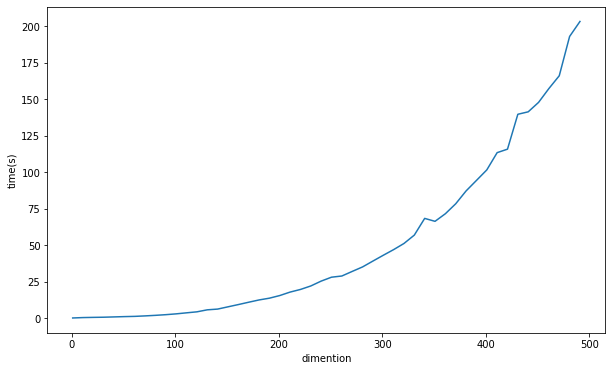

In [23]:
ana_ad.plot_time_vs_dim()

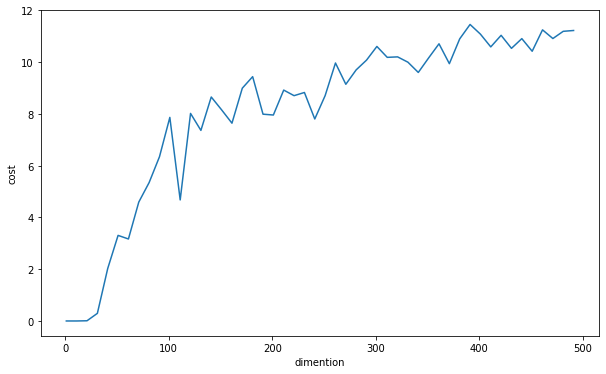

In [24]:
ana_ad.plot_cost_vs_dim()

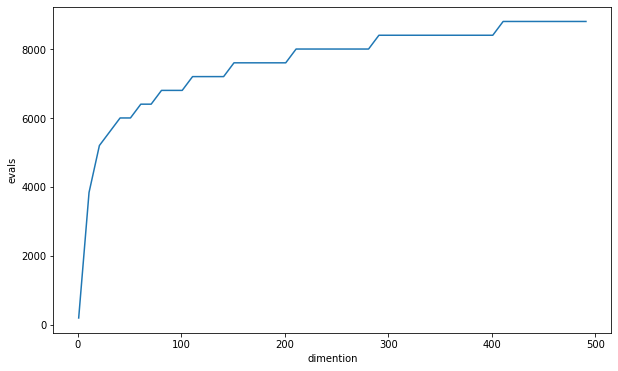

In [25]:
ana_ad.plot_evals_vs_dim()

In [49]:
cmals = cma_es()
paras = {'x0': None,
         'std': None,
         'tol': 1e-5, 
         'adjust_func': line_search(), 
         'record': False, 
         'verbose': False}
cmals.set_parameters(paras)
stats_ad = test_high_dimension_cma(cmals)

dim: 1, time: 0.08340287208557129, cost: 2.3625024323514765e-06, evals: 1664.0
dim: 11, time: 0.5954139232635498, cost: 8.958413726833925e-06, evals: 15332.0
dim: 21, time: 2.347928047180176, cost: 1.6507724756031905e-06, evals: 62730.0
dim: 31, time: 3.235852003097534, cost: 2.0514384546643782e-07, evals: 81775.0
dim: 41, time: 3.4786341190338135, cost: 1.6624744647586454e-07, evals: 82175.0
dim: 51, time: 4.293909311294556, cost: 1.847939263832643e-07, evals: 87709.0
dim: 61, time: 8.873278856277466, cost: 3.931640835119765e-08, evals: 183787.0
dim: 71, time: 7.611516952514648, cost: 2.0863262095716095e-07, evals: 142446.0
dim: 81, time: 8.071245193481445, cost: 1.0038160991321377e-06, evals: 151922.0
dim: 91, time: 9.723947048187256, cost: 1.5907748649333198, evals: 158136.0
dim: 101, time: 11.778653860092163, cost: 1.0216651608183196, evals: 168832.0
dim: 111, time: 12.905382871627808, cost: 2.1750144302736953, evals: 195588.0
dim: 121, time: 14.066025018692017, cost: 2.21201435905

In [50]:
ana_cmals = post_analysis_highD(stats_ad)

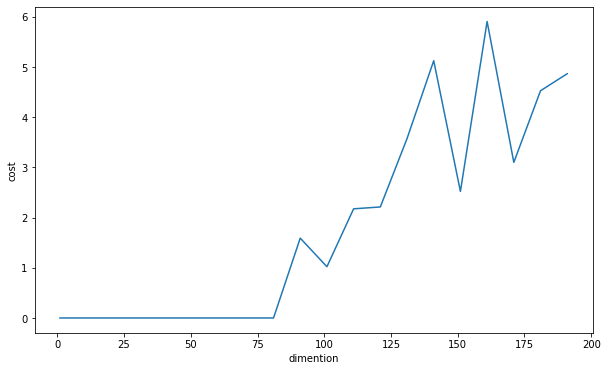

In [51]:
ana_cmals.plot_cost_vs_dim()

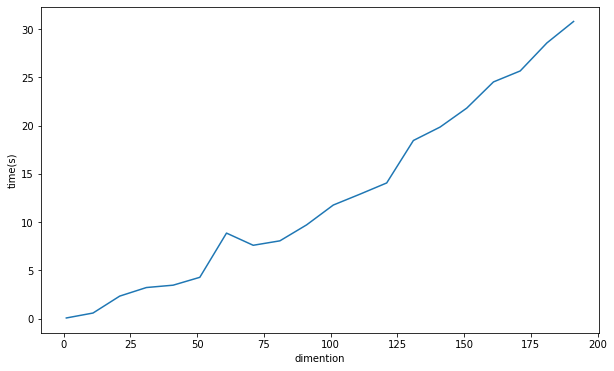

In [52]:
ana_cmals.plot_time_vs_dim()

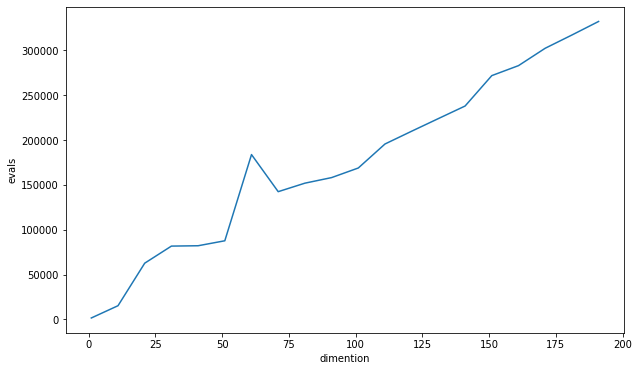

In [53]:
ana_cmals.plot_evals_vs_dim()

In [73]:
times[:31]

array([ 0.11569095,  0.54694891,  1.77832603,  3.1556952 ,  4.25439715,
        4.7830739 ,  9.72276783,  7.5497489 , 11.78546405, 12.46482205,
       13.78765798, 16.59674883, 18.1686368 , 21.06956172, 22.95768309,
       25.64481497, 28.63089943, 30.39006782, 33.27890825, 35.56559014,
       39.86449409, 44.82366586, 57.56089711, 58.77844214, 54.20078111,
        2.13337684,  0.37070727,  4.29377413, 14.28205085, 24.16168189,
       23.77196813])

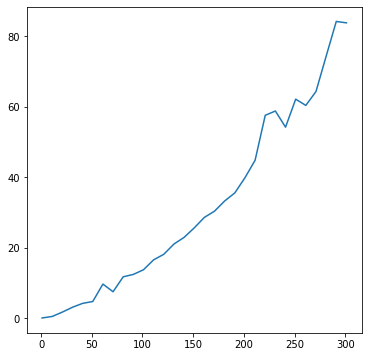

In [78]:
fig = plt.figure(figsize=(6,6))
plt.plot(dims[:31], times[:31])

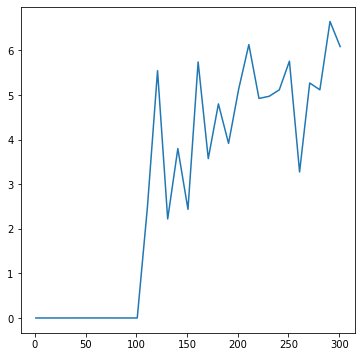

In [79]:
fig = plt.figure(figsize=(6,6))
plt.plot(dims[:31], cost_[:31])